<ipython-input-1-aab3fe710dd2>:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() #rescale subplots


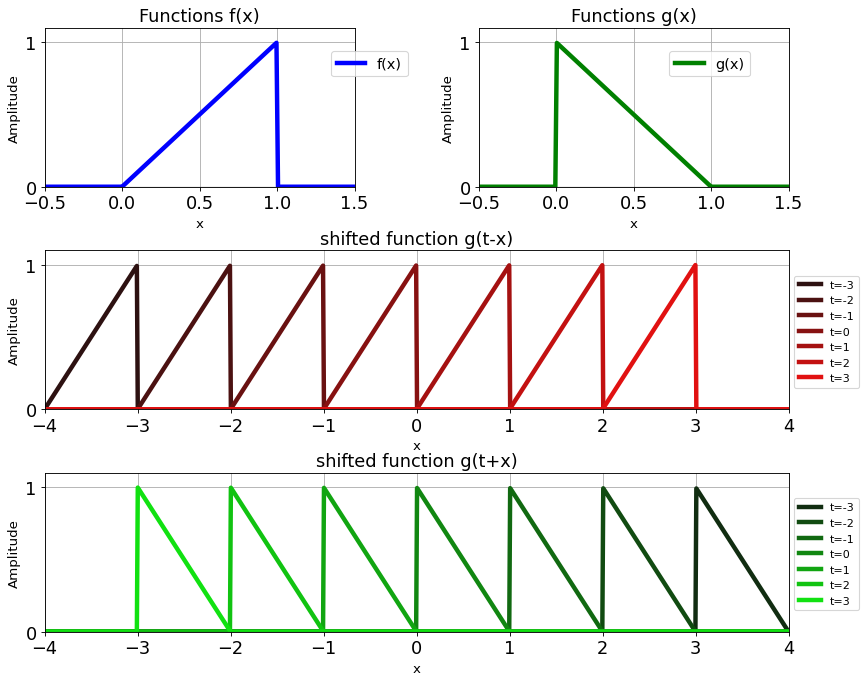

In [1]:
#functions f(x),g(x),g(t-x),g(t+x)
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

global i
i = np.complex(0,1)

#data

x=np.linspace(-5,5,1000)

def f(x):
    length=len(x)
    result=np.zeros(length, dtype=float)
    for k in range(0,length):
        if x[k]>1 or x[k]<0:
            result[k]=0
        else:
            result[k]=x[k]
    return result

def g(x):
    length=len(x)
    result=np.zeros(length, dtype=float)
    for k in range(0,length):
        if x[k]>1 or x[k]<0:
            result[k]=0
        else:
            result[k]=1-x[k]
    return result


#plot
fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')

grid = plt.GridSpec(3,2, wspace=0.4, hspace=0.4)

ax0=plt.subplot(grid[0, 0])
ax1=plt.subplot(grid[0, 1])
ax2=plt.subplot(grid[1, :])
ax3=plt.subplot(grid[2, :]);



#functions
ax0.plot(x,f(x),color="blue",label="f(x)", linewidth=4)
ax0.axhline(0, color='black', lw=1)

ax0.legend(fontsize=13, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Functions f(x)', fontsize=16)
ax0.set_xlabel('x', fontsize=12)
ax0.set_ylabel('Amplitude', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)

ax0.set_xticks(np.linspace(-0.5,1.5,5))
ax0.set_yticks([0,1])
ax0.set_xlim(-0.5,1.5)
ax0.set_ylim(0,1.1)
ax0.grid(True)

#functions
ax1.plot(x,g(x),color="green",label="g(x)", linewidth=4)
ax1.axhline(0, color='black', lw=1)

ax1.legend(fontsize=13, bbox_to_anchor=(0.9,0.9))
ax1.set_title('Functions g(x)', fontsize=16)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=16)

ax1.set_xticks(np.linspace(-0.5,1.5,5))
ax1.set_yticks([0,1])
ax1.set_xlim(-0.5,1.5)
ax1.set_ylim(0,1.1)
ax1.grid(True)


#functions
t=-3;color=45
for iii in range(0,7):
    ax2.plot(x,g(t-x),color="#"+str(format(color,'x'))+"1111",label="t="+str(t), linewidth=4)
    color+=30
    t+=1

ax2.axhline(0, color='black', lw=1)

ax2.legend(fontsize=10, bbox_to_anchor=(1,0.1))
ax2.set_title('shifted function g(t-x)', fontsize=16)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('Amplitude', fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=16)

ax2.set_xticks(np.linspace(-4,4,9))
ax2.set_yticks([0,1])
ax2.set_xlim(-4,4)
ax2.set_ylim(0,1.1)
ax2.grid(True)

#functions
t=-3;color=45
for iii in range(0,7):
    ax3.plot(x,g(t+x),color="#11"+str(format(color,'x'))+"11",label="t="+str(t), linewidth=4)
    color+=30
    t+=1

ax3.axhline(0, color='black', lw=1)

ax3.legend(fontsize=10, bbox_to_anchor=(1,0.1))
ax3.set_title('shifted function g(t+x)', fontsize=16)
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('Amplitude', fontsize=12)
ax3.tick_params(axis='both', which='major', labelsize=16)

ax3.set_xticks(np.linspace(-4,4,9))
ax3.set_yticks([0,1])
ax3.set_xlim(-4,4)
ax3.set_ylim(0,1.1)
ax3.grid(True)


fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

<IPython.core.display.Javascript object>


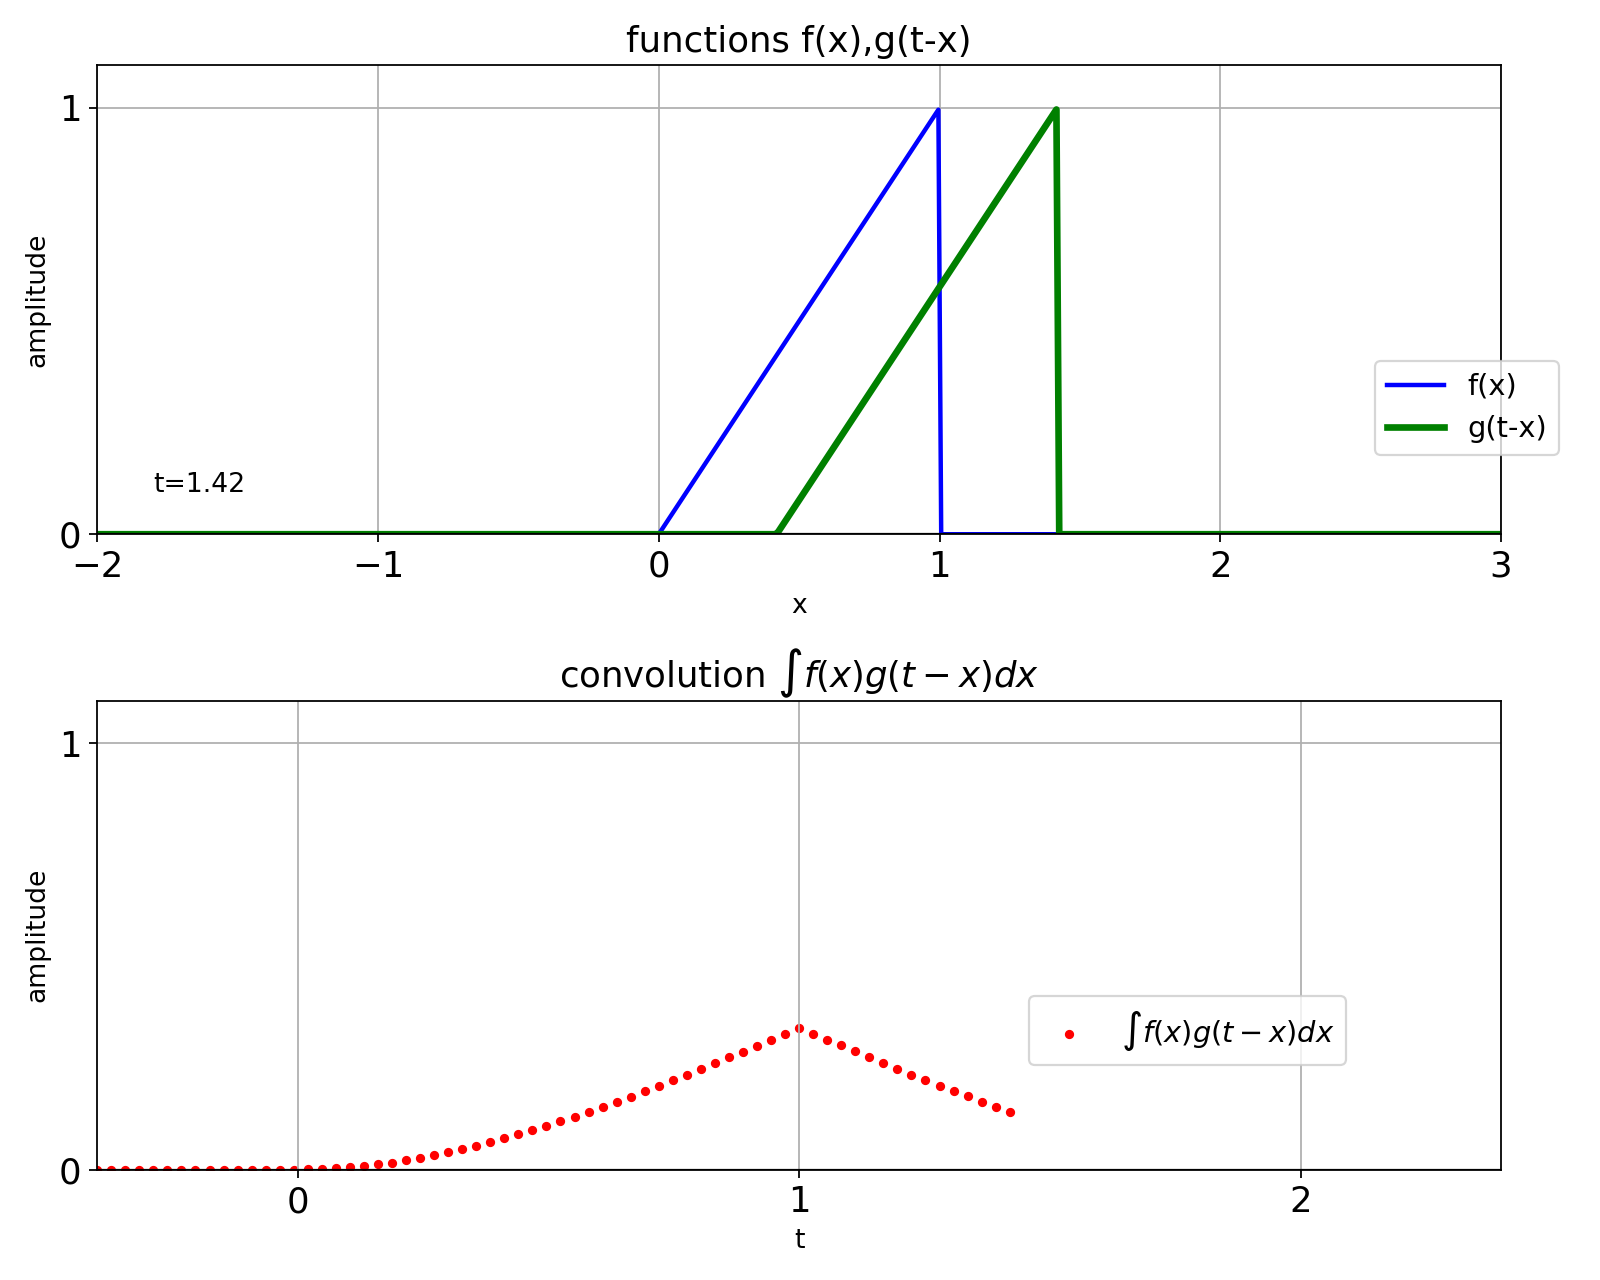

In [2]:
#convolution
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as Animation
import numpy as np

global i
i = np.complex(0,1)

################################################## compute

x=np.linspace(-5,5,1000)

def f(x):
    length=len(x)
    result=np.zeros(length, dtype=float)
    for k in range(0,length):
        if x[k]>1 or x[k]<0:
            result[k]=0
        else:
            result[k]=x[k]
    return result

def g(x):
    length=len(x)
    result=np.zeros(length, dtype=float)
    for k in range(0,length):
        if x[k]>1 or x[k]<0:
            result[k]=0
        else:
            result[k]=1-x[k]
    return result

#animation setup
frames = 101
t_min = -0.4
t_max = 2.4
t = np.linspace(t_min,t_max,frames)
fps = 10

#integration setup
a=0;b=1;N=1001
samples=np.linspace(a,b,N)
h=float(b-a)/N

# plot
fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

ax0=plt.subplot(2,1,1)
ax1=plt.subplot(2,1,2)


#plot all frames and store them in array
allframes0 = []
oneframe0 = [1,1,1]
allframes1 = []
oneframe1 = [1]

#first plot for correct legend
#ax0
oneframe0[0], = ax0.plot(x, f(x), color='blue', linewidth=2, label='f(x)')
oneframe0[1], = ax0.plot(x, g(t[0]-x), color="green", linewidth=3, label='g(t-x)')
oneframe0[2] = ax0.text(-1.8,0.1,'t='+str(np.round(t[0],3)), fontsize='12')
allframes0.append([oneframe0[0],oneframe0[1],oneframe0[2]])
#ax1
integral = h*( np.sum(f([a,b])*g(t[0]-[a,b]))/2 + np.sum(f(samples[1:N-1])*g(t[0]-samples[1:N-1])) )
oneframe1[0] = ax1.scatter(t[0], integral, color='red', s=10, label=r'$\int f(x) g(t-x) dx$')
allframes1.append([oneframe1[0]])
#vector with integration result
integration_results = []

#fill arrays with plots
for ii in range(frames):
    #ax0
    oneframe0[0], = ax0.plot(x, f(x), color='blue', linewidth=2)
    oneframe0[1], = ax0.plot(x, g(t[ii]-x), color="green", linewidth=3)
    oneframe0[2] = ax0.text(-1.8,0.1,'t='+str(np.round(t[ii],3)), fontsize='12')
    allframes0.append([oneframe0[0],oneframe0[1],oneframe0[2]])
    
    #integration
    integral = h*( np.sum(f([a,b])*g(t[ii]-[a,b]))/2 + np.sum(f(samples[1:N-1])*g(t[ii]-samples[1:N-1])) )
    integration_results.append(integral)
    
    #ax1
    oneframe1[0] = ax1.scatter(t[0:ii+1], integration_results, color='red', s=10)
    allframes1.append([oneframe1[0]])
    

#style
ax0.axhline(0, color='black', lw=1)
ax0.legend(fontsize=13, bbox_to_anchor=(0.9,0.4))
ax0.set_title('functions f(x),g(t-x)', fontsize=16)
ax0.set_xlabel('x', fontsize=12)
ax0.set_ylabel('amplitude', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)

ax0.set_xticks(np.linspace(-5,5,11))
ax0.set_yticks([0,1])
ax0.set_xlim(-2,3)
ax0.set_ylim(0,1.1)
ax0.grid(True)

#style
ax1.axhline(0, color='black', lw=1)
ax1.legend(fontsize=13, bbox_to_anchor=(0.9,0.4))
ax1.set_title(r'convolution $\int f(x) g(t-x) dx$', fontsize=16)
ax1.set_xlabel('t', fontsize=12)
ax1.set_ylabel('amplitude', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=16)

ax1.set_xticks(np.linspace(-5,5,11))
ax1.set_yticks([0,1])
ax1.set_xlim(t_min,t_max)
ax1.set_ylim(0,1.1)
ax1.grid(True)

#animate plotted frames
ani0 = Animation.ArtistAnimation(fig, allframes0, interval=1000/fps, blit=True)
ani1 = Animation.ArtistAnimation(fig, allframes1, interval=1000/fps, blit=True)

fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()

<IPython.core.display.Javascript object>


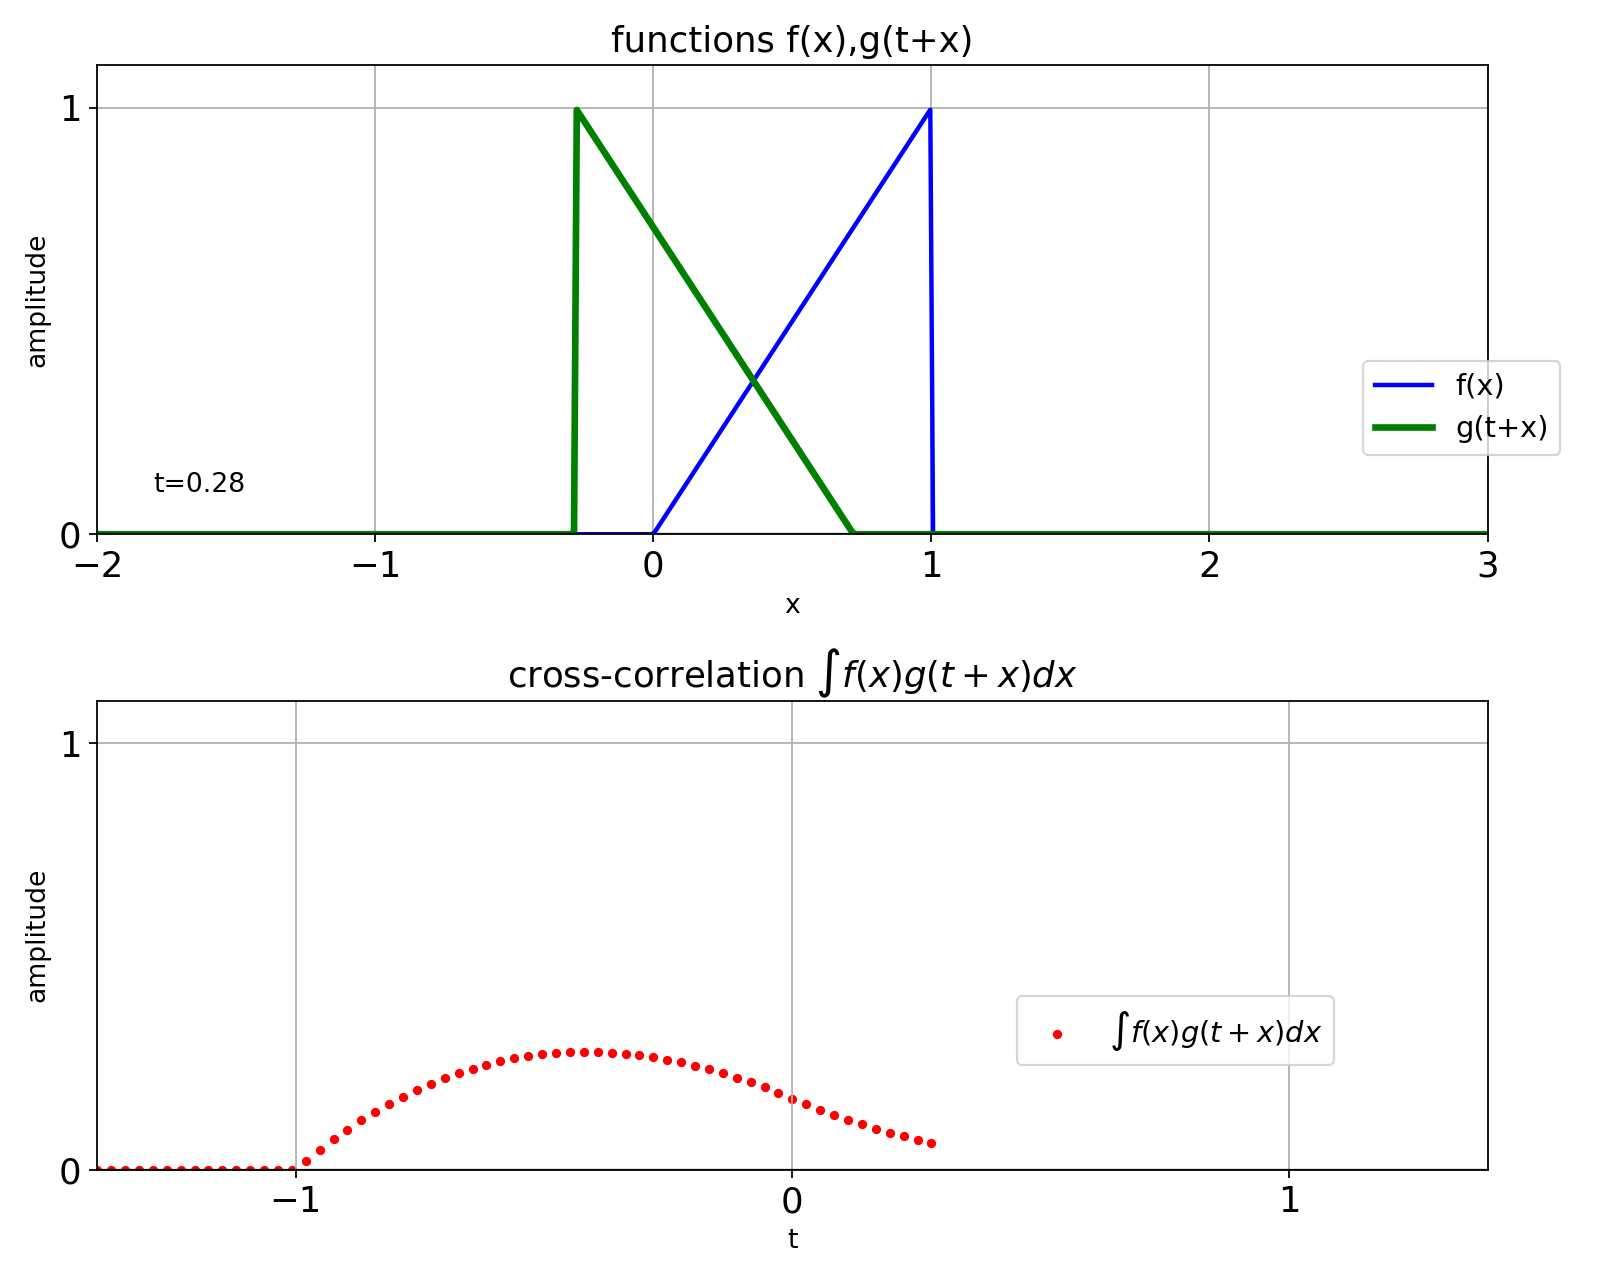

In [3]:
#cross-correlation
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as Animation
import numpy as np

global i
i = np.complex(0,1)

################################################## compute

x=np.linspace(-5,5,1000)

def f(x):
    length=len(x)
    result=np.zeros(length, dtype=float)
    for k in range(0,length):
        if x[k]>1 or x[k]<0:
            result[k]=0
        else:
            result[k]=x[k]
    return result

def g(x):
    length=len(x)
    result=np.zeros(length, dtype=float)
    for k in range(0,length):
        if x[k]>1 or x[k]<0:
            result[k]=0
        else:
            result[k]=1-x[k]
    return result

#animation setup
frames = 101
t_min = -1.4
t_max = 1.4
t = np.linspace(t_min,t_max,frames)
fps = 10

#integration setup
a=0;b=1;N=1001
samples=np.linspace(a,b,N)
h=float(b-a)/N

# plot
fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

ax0=plt.subplot(2,1,1)
ax1=plt.subplot(2,1,2)


#plot all frames and store them in array
allframes0 = []
oneframe0 = [1,1,1]
allframes1 = []
oneframe1 = [1]

#first plot for correct legend
#ax0
oneframe0[0], = ax0.plot(x, f(x), color='blue', linewidth=2, label='f(x)')
oneframe0[1], = ax0.plot(x, g(t[0]+x), color="green", linewidth=3, label='g(t+x)')
oneframe0[2] = ax0.text(-1.8,0.1,'t='+str(np.round(t[0],3)), fontsize='12')
allframes0.append([oneframe0[0],oneframe0[1],oneframe0[2]])
#ax1
integral = h*( np.sum(f([a,b])*g(t[0]+[a,b]))/2 + np.sum(f(samples[1:N-1])*g(t[0]+samples[1:N-1])) )
oneframe1[0] = ax1.scatter(t[0], integral, color='red', s=10, label=r'$\int f(x) g(t+x) dx$')
allframes1.append([oneframe1[0]])
#vector with integration result
integration_results = []

#fill arrays with plots
for ii in range(frames):
    #ax0
    oneframe0[0], = ax0.plot(x, f(x), color='blue', linewidth=2)
    oneframe0[1], = ax0.plot(x, g(t[ii]+x), color="green", linewidth=3)
    oneframe0[2] = ax0.text(-1.8,0.1,'t='+str(np.round(t[ii],3)), fontsize='12')
    allframes0.append([oneframe0[0],oneframe0[1],oneframe0[2]])
    
    #integration
    integral = h*( np.sum(f([a,b])*g(t[ii]+[a,b]))/2 + np.sum(f(samples[1:N-1])*g(t[ii]+samples[1:N-1])) )
    integration_results.append(integral)
    
    #ax1
    oneframe1[0] = ax1.scatter(t[0:ii+1], integration_results, color='red', s=10)
    allframes1.append([oneframe1[0]])
    

#style
ax0.axhline(0, color='black', lw=1)
ax0.legend(fontsize=13, bbox_to_anchor=(0.9,0.4))
ax0.set_title('functions f(x),g(t+x)', fontsize=16)
ax0.set_xlabel('x', fontsize=12)
ax0.set_ylabel('amplitude', fontsize=12)
ax0.tick_params(axis='both', which='major', labelsize=16)

ax0.set_xticks(np.linspace(-5,5,11))
ax0.set_yticks([0,1])
ax0.set_xlim(-2,3)
ax0.set_ylim(0,1.1)
ax0.grid(True)

#style
ax1.axhline(0, color='black', lw=1)
ax1.legend(fontsize=13, bbox_to_anchor=(0.9,0.4))
ax1.set_title(r'cross-correlation $\int f(x) g(t+x) dx$', fontsize=16)
ax1.set_xlabel('t', fontsize=12)
ax1.set_ylabel('amplitude', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=16)

ax1.set_xticks(np.linspace(-5,5,11))
ax1.set_yticks([0,1])
ax1.set_xlim(t_min,t_max)
ax1.set_ylim(0,1.1)
ax1.grid(True)

#animate plotted frames
ani0 = Animation.ArtistAnimation(fig, allframes0, interval=1000/fps, blit=True)
ani1 = Animation.ArtistAnimation(fig, allframes1, interval=1000/fps, blit=True)

fig.gca().set_autoscale_on(False)
plt.tight_layout() #rescale subplots
plt.show()